In [10]:
import pandas as pd
import numpy as np
import os
import typing
import matplotlib.pyplot as plt
import time

from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
#Smooth curve
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
 
    
    
    y_smooth=np.convolve(y, box, 
                           mode='valid'
                          )
   
    return y_smooth

In [3]:
def train_test_split(dataset, ratio):
    scaler = MinMaxScaler()

    
    train_size = int(len(dataset) * ratio)
    test_size = len(dataset) - train_size

    train  = dataset[0:train_size]
    test   = dataset[train_size:]
    return train,test

In [4]:
def graph_predictions_sarima_append_dontfit(dataset,ratio,step=1,ordd=(5,1,0),Sorder=(5,1,0,45),smooth_flag=0):
    
    #try using SARIMA, change modelling options method conv and low memory 
    print("parameters:", ordd)
    print("seasonal parameters:", Sorder)
    
    plt.figure(figsize=(30,15))
    start = time.time()
    train,test = train_test_split(dataset,ratio)
    history = [x for x in train]
    predictions = list()
    # predictions=[x for x in train] #the prediction starts of lagged from history..
    # walk-forward validation
#     print("starting loop")
    model = ARIMA(history, order=ordd,seasonal_order=Sorder)
#         print("itareation #",t/step, "pre model.fit")
    print("start training")
    
#     model_fit = model.fit()#(method='innovations_mle', low_memory=True, cov_type='none')
    model_fit = model.fit(method='statespace', low_memory=True, cov_type='none')
#     model_fit = model.fit(cov_type='robust_approx')
    print("start predicting")
    output = model_fit.forecast(len(test))



    predictions.extend(output)


    plt.plot(test)
    # plt.plot(train)
    # plt.plot(dataset)
    # print(len(dataset))
    print("test: ", len(test))
    print("predictions: ", len(predictions))
    if smooth_flag:
        predictions_ma=[]
        predictions_ma.append(smooth(predictions,30))
        plt.plot(predictions_ma[0], color='red')
    
    else: 
        plt.plot(predictions, color='red')
    # plt.plot(, color='blu')
    plt.grid()
    plt.ylim([20,65])
    
    try:
        MSE = mean_squared_error(test,predictions)
        RMSE = sqrt(MSE)
        print("mean squared error= ",MSE)
    
        print("RMSE= " ,RMSE)
    except:
        print("error calculating, mismatch in dimentions")
        ...
    
    end = time.time()
    print("time taken: ",end - start)
#     plt.rcParams['figure.figsize'] = [1000/2.54, 800/2.54]
    plt.show()
    # print(len(predictions))

    
    # print(predictions_ma)

    # return predictions
    return predictions, test, RMSE,ordd,Sorder,model_fit;


In [12]:
ds = pd.DataFrame()
PTR=[]
"""
"""
number_of_days = 0
number_of_hours=0
for file_name in os.listdir():

    try:
#         print(file_name)
        temp = pd.read_csv( file_name, index_col='dateandtime',parse_dates=True)
        ds = ds.append(temp)
        number_of_hours+=1
    except:
        print("error parsing data")
number_of_days= number_of_hours/25

.git
error parsing data
.ipynb_checkpoints
error parsing data
10_output_0.csv
10_output_1.csv
10_output_10.csv
10_output_11.csv
10_output_12.csv
10_output_13.csv
10_output_14.csv
10_output_15.csv
10_output_16.csv
10_output_17.csv
10_output_18.csv
10_output_19.csv
10_output_2.csv
10_output_20.csv
10_output_21.csv
10_output_22.csv
10_output_23.csv
10_output_24.csv
10_output_3.csv
10_output_4.csv
10_output_5.csv
10_output_6.csv
10_output_7.csv
10_output_8.csv
10_output_9.csv
11_output_0.csv
11_output_1.csv
11_output_10.csv
11_output_11.csv
11_output_12.csv
11_output_13.csv
11_output_14.csv
11_output_15.csv
11_output_16.csv
11_output_17.csv
11_output_18.csv
11_output_19.csv
11_output_2.csv
11_output_20.csv
11_output_21.csv
11_output_22.csv
11_output_23.csv
11_output_24.csv
11_output_3.csv
11_output_4.csv
11_output_5.csv
11_output_6.csv
11_output_7.csv
11_output_8.csv
11_output_9.csv
12_output_0.csv
12_output_1.csv
12_output_10.csv
12_output_11.csv
12_output_12.csv
12_output_13.csv
12_outpu

In [13]:
temp = pd.pivot_table(ds,index = 'dateandtime', values ='spdK/m' , columns ='edge')

temp = temp.groupby([
            pd.Grouper(level='dateandtime'
                       , freq = '16T'  
                      )]
          ).mean()


NameError: name 'smoothed_df' is not defined

In [15]:
limitPer = len(temp) *0.20
temp = temp.dropna(thresh=limitPer, axis=1)
temp.count()

edge
-178543139#2                                              1014
-182371948#0                                               570
-182371948#1                                               355
-182371948#2                                               384
-182371955#0                                               659
                                                          ... 
:cluster_7937296083_8074011466_8074011468_2                416
:cluster_7937296083_8074011466_8074011468_6                514
:cluster_7937296083_8074011466_8074011468_7                329
:cluster_8279196058_8279196059_0                           431
:cluster_8574575726_8574575729_8574575735_8574575737_2     762
Length: 1788, dtype: int64

In [16]:
df = temp.fillna(temp.max())

In [17]:
df = df.loc[:, (temp != 0).any(axis=0)]

In [18]:
smoothed_df = []
for cntrDf in range(0, df.shape[-1]):
    
    smoothed_df.append((df.values[:,cntrDf]))



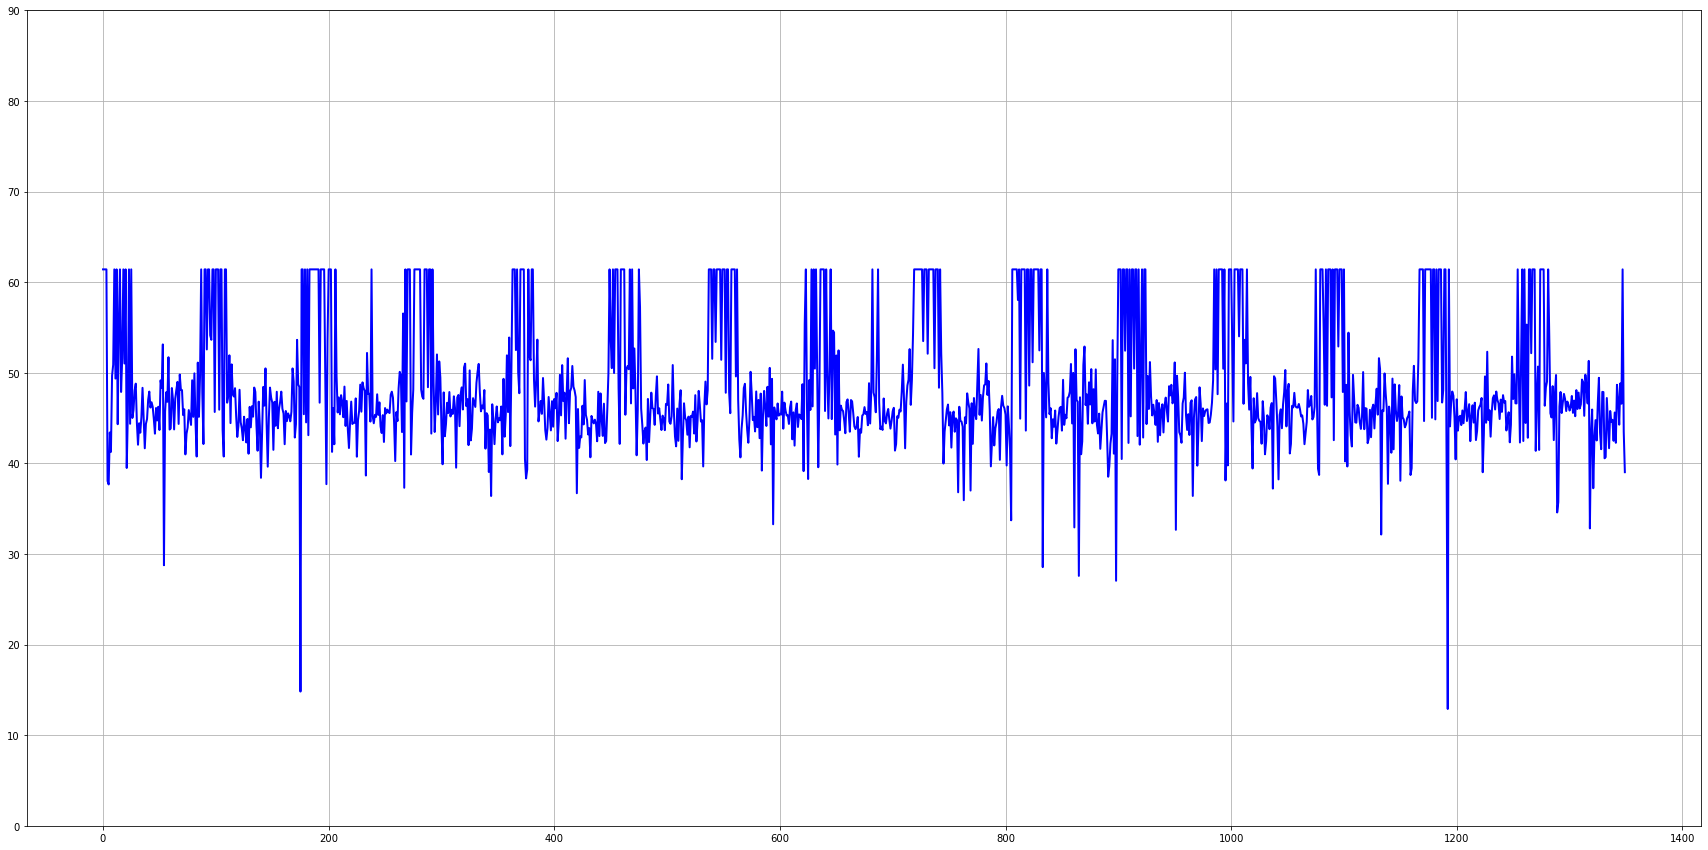

In [30]:
plt.rcParams["figure.figsize"] = (30,15)
# plt.plot(smooth(df.values[:,0],40), 'r-', lw=2)
plt.plot(smoothed_df[1100], 'b-', lw=2)
plt.ylim([0 , 90])
plt.grid()


In [20]:
periodicity= int(len(smoothed_df[0])/int(number_of_days))

In [21]:
periodicity

90

In [ ]:
PTR.append(graph_predictions_sarima_append_dontfit(smoothed_df[0],0.7,3,(5, 0, 1) ,(3, 0, 1, periodicity), 0))#16T#remove optmization? 

parameters: (5, 0, 1)
seasonal parameters: (3, 0, 1, 90)
start training
